In [1]:
# -----------------------------------------------------------------------------------------------------
#   l1-q7, Shooting method for the 1D infinite potential well problem
#   Author: Yi-Ming Ding
#   Updated: Mar 19, 2025
#   Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html
# -----------------------------------------------------------------------------------------------------

For
$$
\frac{d^2\phi}{dx^2}=-k^2\phi, \phi(0)=\phi(1)=0
$$
define $d\phi/dx=\psi$, then we have to solve the system
$$
\frac{d\phi}{dx}=\psi,  \frac{d\psi}{dx}=-k^2\phi
$$
Note that the exact result is
$$
k_n=n\pi, \phi_n(x)=\sin(k_n x), n = 1, 2, 3...
$$

In [2]:
def diff_eq(x, y, k):
    phi, psi = y
    dphi_dx = psi
    dpsi_dx = -k**2 * phi
    return [dphi_dx, dpsi_dx]

In [3]:
from scipy.integrate import solve_ivp

def target_function(k, target_x=1.0):
    y0 = [0.0, 1.0]     # initial condition, with phi(0) = 0, and dphi / dx(0) = 1
    sol = solve_ivp(
        diff_eq,
        t_span=[0, target_x],
        y0=y0,
        args=(k,),
        t_eval=[target_x],
    )
    return sol.y[0][-1]  # return phi(target_x)

In [4]:
from scipy.optimize import root_scalar  # used to find the root of a scalar function
import numpy as np

n_values = [1, 2, 3]    # the indices for the first three eigenvalues
k_values = []   # for saving the eigenvalues

for n in n_values:
    bracket_left = (n - 0.5) * np.pi    # This ensures that the root lies around k_n
    bracket_right = (n + 0.5) * np.pi
    result = root_scalar(
        target_function,
        bracket=[bracket_left, bracket_right],
        method='brentq'
    )
    k_values.append(result.root)
    print(f"k_{n} = {result.root:.5f} (exact: {n * np.pi:.5f})")

k_1 = 3.14095 (exact: 3.14159)
k_2 = 6.28164 (exact: 6.28319)
k_3 = 9.42217 (exact: 9.42478)


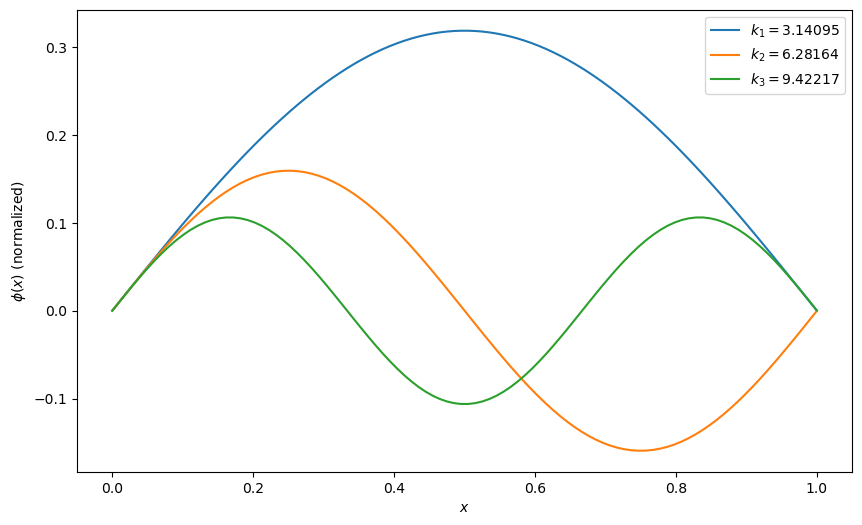

In [5]:

import matplotlib.pyplot as plt

x_eval = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))

for i, k in enumerate(k_values):
    sol = solve_ivp(
        diff_eq,
        t_span=[0, 1],
        y0=[0.0, 1.0],
        args=(k,),
        t_eval=x_eval,
        method='RK45',
        rtol=1e-6,
        atol=1e-9
    )
    phi = sol.y[0]
    plt.plot(x_eval, phi, label=f'$k_{i+1} = {k:.5f}$')

plt.xlabel('$x$')
plt.ylabel('$\phi(x)$ (normalized)')
plt.legend()
plt.show()